### Import the orginal Dataset, Then re run and and scaling and splitting in order to balancec and clean data

## Step 1, 2 

In [2]:
import pandas as pd
import numpy as np
import time
# Found Data Set
# Generally This dataset is about Econmic Freedoms in the world
df = pd.read_csv('efw_cc.csv')
dataframe_copy = df.copy()

In [55]:
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] > 5, 'Econ_Freedom_label'] = '1' # Economic Freedom is above 5
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] <= 5, 'Econ_Freedom_label'] = '0'# Economic Freedom is between 0 and 5

In [56]:
# I dropped all the rows that are NA in the Predicting categories label (Econ_Freedom_label)
dataframe_copy2 = dataframe_copy.dropna(subset = ["Econ_Freedom_label"], inplace=False)
print("\nOrginal Shape of DataFrame", df.shape, "\nShape of dataframe after dropping values that are NA after Categorizing predictor:", dataframe_copy2.shape)


Orginal Shape of DataFrame (3726, 36) 
Shape of dataframe after dropping values that are NA after Categorizing predictor: (3003, 37)


In [57]:
X = dataframe_copy2.drop(['ECONOMIC FREEDOM', 'Econ_Freedom_label'], axis = 1)
y = dataframe_copy2.Econ_Freedom_label

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print("\nTrain Value Spread\n", y_train.value_counts(),
"\nTest Value Spread\n", y_test.value_counts())


Train Value Spread
 1    2144
0     258
Name: Econ_Freedom_label, dtype: int64 
Test Value Spread
 1    537
0     64
Name: Econ_Freedom_label, dtype: int64


In [59]:
y_train

96      1
588     1
2930    1
797     1
836     1
       ..
767     1
1384    1
541     1
1362    1
54      1
Name: Econ_Freedom_label, Length: 2402, dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(y_train)
y_train['Labels_Enc'] = type_labels
# type_le.classes_
# type_labels2 = type_le.transform(Y_test)
# y_test['Labels_Enc'] = type_labels2

In [ ]:
from sklearn.preprocessing import LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(y)
y_train['Labels_Enc'] = type_labels

In [60]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [61]:
dataframe_correlation = pd.concat([dataframe_copy['ECONOMIC FREEDOM'],X_train], axis = 1)

In [62]:
corr_matrix = dataframe_correlation.corr()
corr_matrix_specific = np.abs(corr_matrix['ECONOMIC FREEDOM'])
top_correlations = corr_matrix_specific.sort_values(ascending = False)

In [63]:
chosen_correlations = top_correlations['4_trade':'4b_regulatory_trade_barriers']

In [64]:
correlation_index = chosen_correlations.index
X_train_corr = X_train.loc[:,correlation_index]
X_test_corr = X_test.loc[:,correlation_index]

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train_corr)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_corr),columns = X_train_corr.columns)  
X_test_scaled = pd.DataFrame(scaler.transform(X_test_corr),columns = X_test_corr.columns)

#print("\nShape of Training set:", X_train_scaled.shape, '\nShape of Testing Set:', X_test_scaled.shape)

In [66]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

### Step 3: 


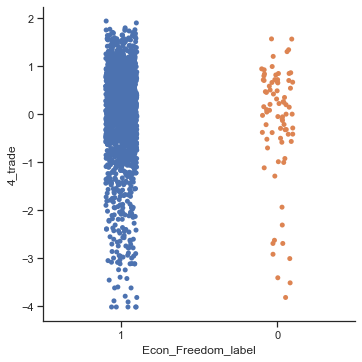

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

training_set = pd.concat([X_train, y_train], axis = 1)
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Econ_Freedom_label", y="4_trade", data=training_set);

#### This is clearly a categorical variable so it is either going to be I would consider this to binary, the distirbution based upon jus the training set it would appear that this is a binomial distribution just becasue of the fact that it is predicting either 0 or a 1. Later on if there were more variables to identify this would notion would change

# Step 4: 

# KNN

##### I ran into some errors which wouldn't let me use f1 as a scorer, becasue it wasnt able to attribute the positive label aka yes or no of the prediction, So I modiified the F1 scorer to make it so that 1 is yes and 0 is no
###### 1 = greater than 5, 0 is less than or equal to 5. So in other words is the value above 5 Yes everythiing else no. 

#### Base

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

knn_base = KNeighborsClassifier()
knn_base.fit(X_train , y_train)
prediction = knn_base.predict(X_test)
training_predictioin = knn_base.predict(X_train)

print('\nKNN Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized


Train Accuracy:  0.9783513738551207

Test Accuracy:  0.9717138103161398

Test - No. Of Correct Predictions 584.0 / 601

Test Confusion Matrix:
[[ 53  11]
 [  6 531]]

Test Precision = 0.971037
Test Recall = 0.971714
Test F1 Score = 0.971204

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        64
           1       0.98      0.99      0.98       537

    accuracy                           0.97       601
   macro avg       0.94      0.91      0.92       601
weighted avg       0.97      0.97      0.97       601



#### Hyperparamater Tuning

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [120]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label= '1')
param_grid = {
    'metric':['manhattan', 'minkowski', 'euclidean'],
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, scoring = 'accuracy', cv = 5, n_jobs = 4, verbose = True)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   11.2s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'minkowski', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [121]:
knn_best_params = grid_knn.best_params_
knn_results = pd.DataFrame(grid_knn.cv_results_)
worst_score = knn_results.loc[np.argmax(knn_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_knn.best_score_)
print("Optimal Hyperparameter Values: ", knn_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.969192
Optimal Hyperparameter Values:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Worst Hyperparameter Valeus:  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}


#### Optimized

In [122]:
knn2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10, weights = 'distance')
knn2.fit(X_train, y_train)
prediction = knn2.predict(X_test)
training_predictioin = knn2.predict(X_train)

print('\nKNN Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized


Train Accuracy:  1.0

Test Accuracy:  0.9733777038269551

Test - No. Of Correct Predictions 585.0 / 601

Test Confusion Matrix:
[[ 53  11]
 [  5 532]]

Test Precision = 0.972719
Test Recall = 0.973378
Test F1 Score = 0.972797

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        64
           1       0.98      0.99      0.99       537

    accuracy                           0.97       601
   macro avg       0.95      0.91      0.93       601
weighted avg       0.97      0.97      0.97       601



# Logistic Regression

#### Base

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

logreg_base = LogisticRegression()
logreg_base.fit(X_train, y_train)
prediction = logreg_base.predict(X_test)
print("Training R^2 set score: {:.2f}".format(logreg_base.score(X_train, y_train)))
print("Test R^2 set score: {:.2f}".format(logreg_base.score(X_test, y_test)))

r2 = r2_score(y_test , prediction)
RMSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)
print("\nLogistic Regression Base")
print('\nR squared score:', r2, '\nRoot Mean Squared Error:', RMSE, '\nMean Absolute Error', MAE)

Training R^2 set score: 0.98
Test R^2 set score: 0.97

Logistic Regression Base

R squared score: 0.6502560521415269 
Root Mean Squared Error: 0.033277870216306155 
Mean Absolute Error 0.033277870216306155


#### Hyperparamater Tuning

In [113]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

param_grid_log = {
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4,4,20),
        'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    }



log_grid = GridSearchCV(logreg, param_grid = param_grid_log, scoring = 'neg_root_mean_squared_error', verbose = True, cv=5, n_jobs=4)
log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 2556 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 5140 tasks      | elapsed:   49.8s
[Parallel(n_jobs=4)]: Done 7940 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 8000 out of 8000 | elapsed:  1.6min finished
C:\Users\scott\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scott\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='neg_root_mean_squared_error', verbose=True)

#### Printing out the Best + Worst Performing Paramaters

In [56]:
log_best_params = log_grid.best_params_
log_results = pd.DataFrame(log_grid.cv_results_)
worst_score = log_results.loc[np.argmax(log_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (neg_root_mean_squared_error): %f" % log_grid.best_score_)
print("Optimal Hyperparameter Values: ", log_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (neg_root_mean_squared_error): -0.163087
Optimal Hyperparameter Values:  {'C': 0.23357214690901212, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Worst Hyperparameter Valeus:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}


#### Evaluating the hyperparamater tuning on test data

In [58]:
logreg2 = LogisticRegression(C = 0.23357214690901212, max_iter = 1000, penalty = 'l2', solver = 'saga')
logreg2.fit(X_train , y_train)
prediction = logreg2.predict(X_test)
print("Training R^2 set score: {:.2f}".format(logreg2.score(X_train, y_train)))
print("Test R^2 set score: {:.2f}".format(logreg2.score(X_test, y_test)))

r2 = r2_score(y_test , prediction)
RMSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)

print("\nLogistic Regression Optimized")
print('\nR squared score:', r2, '\nRoot Mean Squared Error:', RMSE, '\nMean Absolute Error', MAE)

Training R^2 set score: 0.98
Test R^2 set score: 0.98

Logistic Regression Optimized

R squared score: 0.7872189768100548 
Root Mean Squared Error: 0.019966722129783693 
Mean Absolute Error 0.019966722129783693


# Support Vector Machines

#### Base

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

svm_base = SVC().fit(X_train, y_train)


prediction = svm_base.predict(X_test)
training_predictioin = svm_base.predict(X_train)

print('\SVM Base\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))

\SVM Base


Train Accuracy:  0.9837635303913406

Test Accuracy:  0.9633943427620633

Test - No. Of Correct Predictions 579.0 / 601

Test Confusion Matrix:
[[ 51  13]
 [  9 528]]

Test Precision = 0.962556
Test Recall = 0.963394
Test F1 Score = 0.962872

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        64
           1       0.98      0.98      0.98       537

    accuracy                           0.96       601
   macro avg       0.91      0.89      0.90       601
weighted avg       0.96      0.96      0.96       601



#### Hyperparamater Tuning

In [85]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [101]:
param_grid = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmmoid'],
    'gamma':[0.5, 1, 5, 10 ,50, 100, 500, 1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid , scorer =f1_scorer, cv = cv, n_jobs = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmmoid']})

In [102]:
svm_best_params = grid_svm.best_params_
svm_results = pd.DataFrame(grid_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.978794
Optimal Hyperparameter Values:  {'C': 0.4, 'gamma': 0.5, 'kernel': 'linear'}
Worst Hyperparameter Valeus:  {'C': 0.9, 'gamma': 1000, 'kernel': 'sigmmoid'}


In [95]:
svm2 = SVC(C = 0.4, gamma = 0.5, kernel = 'linear')
svm2.fit(X_train, y_train)
prediction = svm2.predict(X_test)
training_predictioin = svm2.predict(X_train)

print('\SVM Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))

\SVM Optimized


Train Accuracy:  0.9804329725228976

Test Accuracy:  0.9633943427620633

Test - No. Of Correct Predictions 579.0 / 601

Test Confusion Matrix:
[[ 52  12]
 [ 10 527]]

Test Precision = 0.962932
Test Recall = 0.963394
Test F1 Score = 0.963138

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        64
           1       0.98      0.98      0.98       537

    accuracy                           0.96       601
   macro avg       0.91      0.90      0.90       601
weighted avg       0.96      0.96      0.96       601



#### No real change in F1 or even accuracy between the hyperparamter scaling. 
Default SVC 
- Gamma = "Scale" 
    - this is equal to 1/(number of features * X.varriance) 
- Kernal = rbf
- C = 1.0 


Hyperparamaters 


- Gamma = 0.4
- Kernal = Linear
- C = 0.4 
